# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold reponse info
city_id = []
weather_cities = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Get weather data
counter = 1
for name in cities:
    try:
        weather_response = requests.get(query_url + name).json()
        weather_cities.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        if counter == 50:
            print(f" Processing Record Number: {counter} | {name}")
            city_id.append(counter)
            counter = counter + 1
            time.sleep(60)
        else:
            print(f" Processing Record Number: {counter} | {name}")
            city_id.append(counter)
            counter = counter + 1
    except KeyError:
        print("City not found. Skipping...")

 Processing Record Number: 1 | pandan
 Processing Record Number: 2 | tuktoyaktuk
 Processing Record Number: 3 | vila franca do campo
 Processing Record Number: 4 | remontnoye
 Processing Record Number: 5 | bubaque
 Processing Record Number: 6 | sola
 Processing Record Number: 7 | carnarvon
 Processing Record Number: 8 | bathsheba
 Processing Record Number: 9 | atuona
 Processing Record Number: 10 | faanui
 Processing Record Number: 11 | charters towers
 Processing Record Number: 12 | hobart
 Processing Record Number: 13 | tasiilaq
 Processing Record Number: 14 | warrington
 Processing Record Number: 15 | ushuaia
 Processing Record Number: 16 | kruisfontein
 Processing Record Number: 17 | alofi
 Processing Record Number: 18 | tinskoy
 Processing Record Number: 19 | busselton
 Processing Record Number: 20 | yellowknife
 Processing Record Number: 21 | severo-kurilsk
 Processing Record Number: 22 | rikitea
 Processing Record Number: 23 | lata
 Processing Record Number: 24 | luderitz
City n

 Processing Record Number: 186 | yantal
 Processing Record Number: 187 | keti bandar
City not found. Skipping...
 Processing Record Number: 188 | la ciotat
 Processing Record Number: 189 | antofagasta
 Processing Record Number: 190 | kambove
 Processing Record Number: 191 | tocopilla
 Processing Record Number: 192 | ascension
 Processing Record Number: 193 | barra do garcas
 Processing Record Number: 194 | vila do maio
 Processing Record Number: 195 | novikovo
 Processing Record Number: 196 | broome
 Processing Record Number: 197 | baherden
 Processing Record Number: 198 | buraydah
City not found. Skipping...
 Processing Record Number: 199 | sault sainte marie
 Processing Record Number: 200 | omboue
 Processing Record Number: 201 | ponta delgada
City not found. Skipping...
 Processing Record Number: 202 | te anau
 Processing Record Number: 203 | roma
City not found. Skipping...
City not found. Skipping...
 Processing Record Number: 204 | burnie
 Processing Record Number: 205 | prince r

 Processing Record Number: 372 | thompson
 Processing Record Number: 373 | makaha
 Processing Record Number: 374 | abilene
 Processing Record Number: 375 | along
 Processing Record Number: 376 | ulladulla
 Processing Record Number: 377 | bengkulu
 Processing Record Number: 378 | oktyabrskoye
 Processing Record Number: 379 | liwale
 Processing Record Number: 380 | albanel
 Processing Record Number: 381 | jumla
 Processing Record Number: 382 | sinnamary
 Processing Record Number: 383 | songkhla
 Processing Record Number: 384 | fuling
 Processing Record Number: 385 | cururupu
 Processing Record Number: 386 | kudahuvadhoo
 Processing Record Number: 387 | cayenne
 Processing Record Number: 388 | quatre cocos
 Processing Record Number: 389 | rabo de peixe
 Processing Record Number: 390 | caravelas
 Processing Record Number: 391 | asosa
 Processing Record Number: 392 | nevsehir
 Processing Record Number: 393 | port macquarie
 Processing Record Number: 394 | hobyo
 Processing Record Number: 39

 Processing Record Number: 559 | kirksville
 Processing Record Number: 560 | touros
 Processing Record Number: 561 | sarahan
City not found. Skipping...
 Processing Record Number: 562 | abyek
 Processing Record Number: 563 | puerto baquerizo moreno
 Processing Record Number: 564 | aripuana
 Processing Record Number: 565 | taunggyi
 Processing Record Number: 566 | lovozero
 Processing Record Number: 567 | bowen
 Processing Record Number: 568 | malakal
 Processing Record Number: 569 | kalangala
City not found. Skipping...
City not found. Skipping...
 Processing Record Number: 570 | general pico
City not found. Skipping...
 Processing Record Number: 571 | okhotsk
 Processing Record Number: 572 | tuy hoa
 Processing Record Number: 573 | motygino
 Processing Record Number: 574 | roald
 Processing Record Number: 575 | wana
City not found. Skipping...
 Processing Record Number: 576 | saint-georges
 Processing Record Number: 577 | sept-iles
 Processing Record Number: 578 | el rosario


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame from the information above
weather_data_df = pd.DataFrame({"City ID" : city_id,
                                "City" : weather_cities,
                                "Country" : country,
                                "Latitude" : lat,
                                "Longitude" : long,
                                "Max. Temp (F)" : max_temp,
                                "Humidity" : humidity,
                                "Cloudiness" : cloudiness,
                                "Wind Speed" : wind_speed,
                                "Date" : date})

# Save the dataframe to a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data_df.to_csv("../output_data/cities.csv", encoding = "utf-8", index = False)

# Display the dataframe to the terminal
weather_data_df

,City ID,City,Country,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
0,1,Pandan,PH,14.0453,124.1694,84.88,68,55,3.33,1643512262
1,2,Tuktoyaktuk,CA,69.4541,-133.0374,-6.07,96,100,16.24,1643512262
2,3,Vila Franca do Campo,PT,37.7167,-25.4333,56.19,69,78,10.47,1643512238
3,4,Remontnoye,RU,46.5614,43.6501,32.49,93,94,15.41,1643512263
4,5,Bubaque,GW,11.2833,-15.8333,78.21,59,40,12.26,1643512263
...,...,...,...,...,...,...,...,...,...,...
573,574,Roald,NO,62.5833,6.1333,41.05,81,75,21.85,1643512543
574,575,Wana,PK,32.2989,69.5725,44.71,49,17,3.91,1643512544
575,576,St. George's,GD,12.0564,-61.7485,76.62,75,37,10.94,1643512544
576,577,Sept-Îles,CA,50.2001,-66.3821,9.05,58,100,8.01,1643512545


In [5]:
# Display the dataframe statistics
weather_data_df.describe()

,City ID,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,289.500000,19.692362,17.100622,49.707664,73.885813,57.295848,7.888478,1.643512e+09
std,166.998503,32.799441,88.367467,29.768061,18.918344,40.944702,6.213476,1.006832e+02
min,1.000000,-54.800000,-179.166700,-30.890000,10.000000,0.000000,0.000000,1.643512e+09
25%,145.250000,-8.038425,-61.133550,28.435000,65.000000,10.000000,3.515000,1.643512e+09
50%,289.500000,24.361150,22.760500,58.185000,77.000000,72.000000,6.185000,1.643512e+09
75%,433.750000,46.689950,94.752725,74.125000,88.000000,100.000000,10.265000,1.643512e+09
max,578.000000,78.218600,178.416700,96.170000,100.000000,100.000000,43.730000,1.643513e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_test_value = weather_data_df["Humidity"].max()

In [7]:
#  Get the indices of cities that have humidity over 100%.

# If there is at least 1 city with a humidity over 100%
# Create a list of indices of the the cities that have humidity over 100%
if humidity_test_value > 100:
    humidity_over_100_df = weather_data_df.loc[weather_data_df["Humidity"] > 100, :]
    humidity_over_100_indices = humidity_over_100_df.index, tolist()
    print(humidity_over_100_indices)
# If there are no cities with humidity over 100%
else:
    print("There are no cities with humidity > 100%")

There are no cities with humidity > 100%


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# If there is at least 1 city with a humidity over 100%
# Create a dataframe without the cities with humidity over 100%
if humidity_test_value > 100:
    clean_city_data = weather_data_df.drop(humidity_over_100_indices, inplace = False)
else:
    clean_city_data = weather_data_df.copy()

# Display the new dataframe to the terminal
clean_city_data

,City ID,City,Country,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
0,1,Pandan,PH,14.0453,124.1694,84.88,68,55,3.33,1643512262
1,2,Tuktoyaktuk,CA,69.4541,-133.0374,-6.07,96,100,16.24,1643512262
2,3,Vila Franca do Campo,PT,37.7167,-25.4333,56.19,69,78,10.47,1643512238
3,4,Remontnoye,RU,46.5614,43.6501,32.49,93,94,15.41,1643512263
4,5,Bubaque,GW,11.2833,-15.8333,78.21,59,40,12.26,1643512263
...,...,...,...,...,...,...,...,...,...,...
573,574,Roald,NO,62.5833,6.1333,41.05,81,75,21.85,1643512543
574,575,Wana,PK,32.2989,69.5725,44.71,49,17,3.91,1643512544
575,576,St. George's,GD,12.0564,-61.7485,76.62,75,37,10.94,1643512544
576,577,Sept-Îles,CA,50.2001,-66.3821,9.05,58,100,8.01,1643512545


In [9]:
# Display the dataframe statistics
clean_city_data.describe()

,City ID,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,289.500000,19.692362,17.100622,49.707664,73.885813,57.295848,7.888478,1.643512e+09
std,166.998503,32.799441,88.367467,29.768061,18.918344,40.944702,6.213476,1.006832e+02
min,1.000000,-54.800000,-179.166700,-30.890000,10.000000,0.000000,0.000000,1.643512e+09
25%,145.250000,-8.038425,-61.133550,28.435000,65.000000,10.000000,3.515000,1.643512e+09
50%,289.500000,24.361150,22.760500,58.185000,77.000000,72.000000,6.185000,1.643512e+09
75%,433.750000,46.689950,94.752725,74.125000,88.000000,100.000000,10.265000,1.643512e+09
max,578.000000,78.218600,178.416700,96.170000,100.000000,100.000000,43.730000,1.643513e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

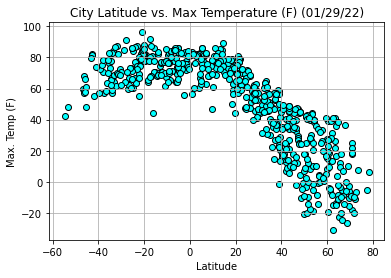

In [10]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max. Temp (F)"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Max Temperature (F) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp (F)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [11]:
print("The code is analyzing the relationship between Temperature as the Latitude moves from the southern to the northern hemisphere. The changes showed that north and osuth hemispheres are having opposite seasons")

The code is analyzing the relationship between Temperature as the Latitude moves from the southern to the northern hemisphere. The changes showed that north and osuth hemispheres are having opposite seasons


## Latitude vs. Humidity Plot

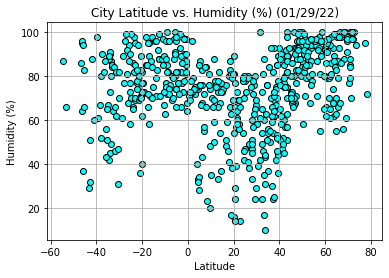

In [12]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Humidity (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [13]:
print("The code is analyzing the relationship between Humidity and a city's location on the planet. From the data, it appears that cities with Latitudes between 0 and 40 degrees are experiencing a wider range of Humidity values compared to other Latitude values.")

The code is analyzing the relationship between Humidity and a city's location on the planet. From the data, it appears that cities with Latitudes between 0 and 40 degrees are experiencing a wider range of Humidity values compared to other Latitude values.


## Latitude vs. Cloudiness Plot

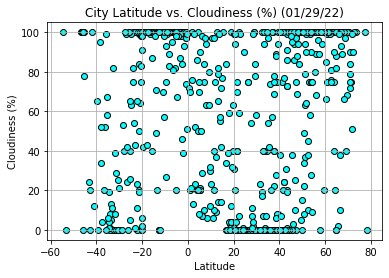

In [14]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Cloudiness (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [15]:
print("The code is analyzing the relationship between the chances of cloudiness and a city's location on the planet. From the data, it appears that the Latitude has a weak correlation with a city's chances of cloudiness.")

The code is analyzing the relationship between the chances of cloudiness and a city's location on the planet. From the data, it appears that the Latitude has a weak correlation with a city's chances of cloudiness.


## Latitude vs. Wind Speed Plot

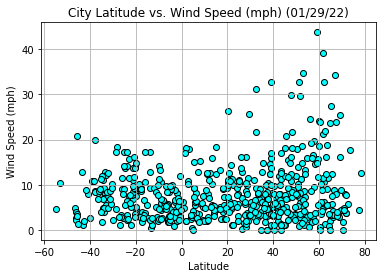

In [16]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Wind Speed (mph) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure4.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [17]:
print("The code is analyzing the relationship between wind speeds and a city's location on the planet. From the data, it appears that the cities in the Latitude range of 40 to 60 degrees have greater chances of experiencing winds of stronger than 30mph compared to the rest of the locations.")

The code is analyzing the relationship between wind speeds and a city's location on the planet. From the data, it appears that the cities in the Latitude range of 40 to 60 degrees have greater chances of experiencing winds of stronger than 30mph compared to the rest of the locations.


## Linear Regression

In [18]:
northern_hemisphere_city_data = clean_city_data.loc[clean_city_data["Latitude"] >= 0, :]
southern_hemisphere_city_data = clean_city_data.loc[clean_city_data["Latitude"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:: -0.8566655094567218
The r-squared is: 0.7338757950927447


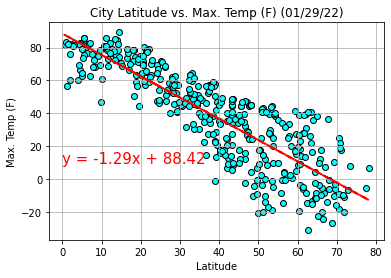

In [19]:
# Perform a linear regression on Latitude vs. Max. Temp
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Max. Temp (F)"])
# Create equation of line to calculate predicted violent crime rate
ntemp_fit = ntemp_slope * northern_hemisphere_city_data["Latitude"] + ntemp_int
# Print R value
print(f"The r-value is:: {ntemp_r}")
print(f"The r-squared is: {ntemp_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Max. Temp (F)"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Max. Temp (F) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp (F)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], ntemp_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))
plt.annotate(line_eq,(0,10), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure5.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:: 0.36776583934777135
The r-squared is: 0.13525171259117078


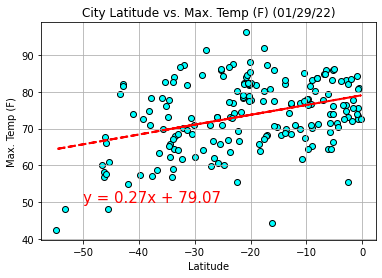

In [20]:
# Perform a linear regression on Latitude vs. Max. Temp
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Max. Temp (F)"])
# Create equation of line to calculate predicted violent crime rate
stemp_fit = stemp_slope * southern_hemisphere_city_data["Latitude"] + stemp_int
# Print R value
print(f"The r-value is:: {stemp_r}")
print(f"The r-squared is: {stemp_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Max. Temp (F)"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Max. Temp (F) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp (F)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], stemp_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))
plt.annotate(line_eq,(-50,50), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [21]:
print("Examining the plots and R values, it appears that for the northern hemisphere there is a strong correlation between the max temperature of a city to it's latitude location. It can't be said to be the same for cities in the southern hemisphere, the R value is suggesting a weak correlation between latitude location and max temperature.")

Examining the plots and R values, it appears that for the northern hemisphere there is a strong correlation between the max temperature of a city to it's latitude location. It can't be said to be the same for cities in the southern hemisphere, the R value is suggesting a weak correlation between latitude location and max temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:: 0.4721979524243439
The r-squared is: 0.22297090627374297


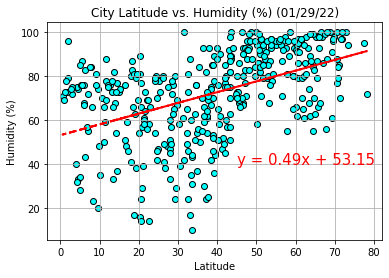

In [22]:
# Perform a linear regression on Latitude vs. Humidity
nhumi_slope, nhumi_int, nhumi_r, nhumi_p, nhumi_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Humidity"])
# Create equation of line to calculate predicted violent crime rate
nhumi_fit = nhumi_slope * northern_hemisphere_city_data["Latitude"] + nhumi_int
# Print R value
print(f"The r-value is:: {nhumi_r}")
print(f"The r-squared is: {nhumi_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Humidity"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Humidity (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], nhumi_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(nhumi_slope,2)) + "x + " + str(round(nhumi_int,2))
plt.annotate(line_eq,(45,40), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure7.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:: 0.3048165011036367
The r-squared is: 0.09291309934506334


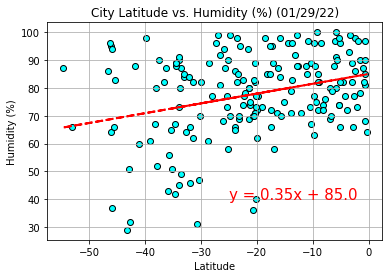

In [23]:
# Perform a linear regression on Latitude vs. Humidity
shumi_slope, shumi_int, shumi_r, shumi_p, shumi_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Humidity"])
# Create equation of line to calculate predicted violent crime rate
shumi_fit = shumi_slope * southern_hemisphere_city_data["Latitude"] + shumi_int
# Print R value
print(f"The r-value is:: {shumi_r}")
print(f"The r-squared is: {shumi_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Humidity"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Humidity (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], shumi_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(shumi_slope,2)) + "x + " + str(round(shumi_int,2))
plt.annotate(line_eq,(-25,40), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure8.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [24]:
print("The data is suggesting that the northern hemisphere has a weak correlation between humidity levels and latitude locations, the southern hemisphere locations shows very weak correlations between the 2 factors. The R values support these statements.")

The data is suggesting that the northern hemisphere has a weak correlation between humidity levels and latitude locations, the southern hemisphere locations shows very weak correlations between the 2 factors. The R values support these statements.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:: 0.3561817536515617
The r-squared is: 0.12686544163430177


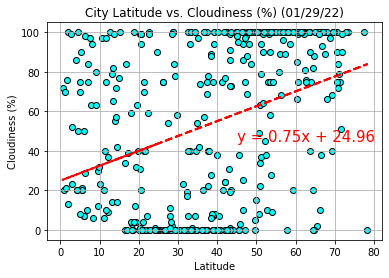

In [25]:
# Perform a linear regression on Latitude vs. Cloudiness
nclou_slope, nclou_int, nclou_r, nclou_p, nclou_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Cloudiness"])
# Create equation of line to calculate predicted violent crime rate
nclou_fit = nclou_slope * northern_hemisphere_city_data["Latitude"] + nclou_int
# Print R value
print(f"The r-value is:: {nclou_r}")
print(f"The r-squared is: {nclou_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Cloudiness"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Cloudiness (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], nclou_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(nclou_slope,2)) + "x + " + str(round(nclou_int,2))
plt.annotate(line_eq,(45,45), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure9.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:: 0.4544963090636933
The r-squared is: 0.20656689495252023


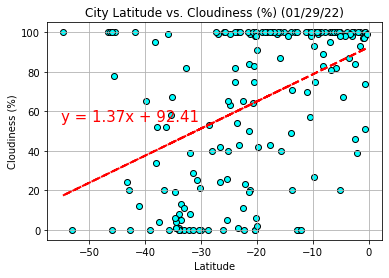

In [26]:
# Perform a linear regression on Latitude vs. Cloudiness
sclou_slope, sclou_int, sclou_r, sclou_p, sclou_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Cloudiness"])
# Create equation of line to calculate predicted violent crime rate
sclou_fit = sclou_slope * southern_hemisphere_city_data["Latitude"] + sclou_int
# Print R value
print(f"The r-value is:: {sclou_r}")
print(f"The r-squared is: {sclou_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Cloudiness"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Cloudiness (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], sclou_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(sclou_slope,2)) + "x + " + str(round(sclou_int,2))
plt.annotate(line_eq,(-55,55), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure10.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [27]:
print("The data is suggesting a weak correlation between cloudiness and latitude locations. The R values for both northern and southern hemispheres are reflecting weak correlation between the 2 factors.")

The data is suggesting a weak correlation between cloudiness and latitude locations. The R values for both northern and southern hemispheres are reflecting weak correlation between the 2 factors.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:: 0.16641115384270525
The r-squared is: 0.02769267212326051


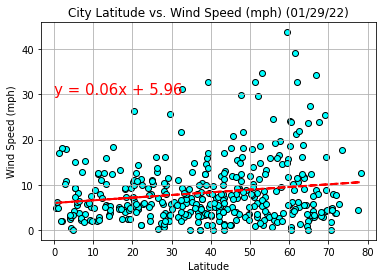

In [28]:
# Perform a linear regression on Latitude vs. Wind Speed
nwind_slope, nwind_int, nwind_r, nwind_p, nwind_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Wind Speed"])
# Create equation of line to calculate predicted violent crime rate
nwind_fit = nwind_slope * northern_hemisphere_city_data["Latitude"] + nwind_int
# Print R value
print(f"The r-value is:: {nwind_r}")
print(f"The r-squared is: {nwind_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Wind Speed"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Wind Speed (mph) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], nwind_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(nwind_slope,2)) + "x + " + str(round(nwind_int,2))
plt.annotate(line_eq,(0,30), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure11.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:: -0.16440148779453417
The r-squared is: 0.027027849189056367


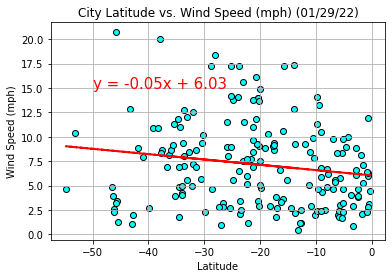

In [29]:
# Perform a linear regression on Latitude vs. Wind Speed
swind_slope, swind_int, swind_r, swind_p, swind_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Wind Speed"])
# Create equation of line to calculate predicted violent crime rate
swind_fit = swind_slope * southern_hemisphere_city_data["Latitude"] + swind_int
# Print R value
print(f"The r-value is:: {swind_r}")
print(f"The r-squared is: {swind_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Wind Speed"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Wind Speed (mph) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], swind_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(swind_slope,2)) + "x + " + str(round(swind_int,2))
plt.annotate(line_eq,(-50,15), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure12.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [30]:
print("The data is suggesting there is a very weak to no correlation at all between the wind speeds and latitude locations. The R values for both northern and southern hemispheres are reflecting very weak correlation between the 2 factors.")

The data is suggesting there is a very weak to no correlation at all between the wind speeds and latitude locations. The R values for both northern and southern hemispheres are reflecting very weak correlation between the 2 factors.
